In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from IPython.display import display

# Step 1: Load data
df = pd.read_csv('Spotify_Usage_Data_301.csv')
df.head()

,Total_Waktu_Harian_Jam,Durasi_Sesi_Rata_rata_Jam,Frekuensi_Akses_Harian,Total_Lagu_Harian,Genre_Sering_Didengarkan
0,1.863866,0.218899,1,8,"Rock, Electronic"
1,0.627198,0.457903,1,5,"Indie, Country, Reggae"
2,1.818369,0.306988,1,29,Reggae
3,0.811042,0.083467,1,34,"Indie, Reggae, Blues"
4,1.590458,0.050000,1,6,Electronic


In [112]:
# Step 2: Tangani Missing Values
missing_counts = df.isnull().sum()
print("Jumlah missing value per kolom:")
print(missing_counts)

# Jika ada missing values, hapus baris terkait
if df.isnull().values.any():
    rows_before = len(df)
    df = df.dropna()
    rows_after = len(df)
    print(f"{rows_before - rows_after} baris dihapus karena missing values.")
else:
    print("\nTidak ditemukan missing values.")

# Step 3: Pisahkan fitur numerik dan kategorik
numerical_cols = [
    'Total_Waktu_Harian_Jam',
    'Durasi_Sesi_Rata_rata_Jam',
    'Frekuensi_Akses_Harian',
    'Total_Lagu_Harian'
]
categorical_col = 'Genre_Sering_Didengarkan'

x = df[numerical_cols]
y_genre = df[categorical_col]

# Step 4: Standarisasi Fitur Numerik
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Jumlah missing value per kolom:
Total_Waktu_Harian_Jam       0
Durasi_Sesi_Rata_rata_Jam    0
Frekuensi_Akses_Harian       0
Total_Lagu_Harian            0
Genre_Sering_Didengarkan     0
dtype: int64

Tidak ditemukan missing values.


Dimension reduction completed. A new DataFrame containing the extracted components has been generated.
        PC1       PC2       PC3
0 -0.434366  0.774448 -0.857633
1  0.845948 -0.138487 -0.900284
2 -0.924762 -0.215822 -0.291779
3 -1.180830 -0.575393  0.726708
4 -0.656160  0.983598 -0.488586

Explained variance ratio per komponen:
PC1: 0.2647
PC2: 0.2547
PC3: 0.2454
Total explained variance (3 komponen): 0.7648


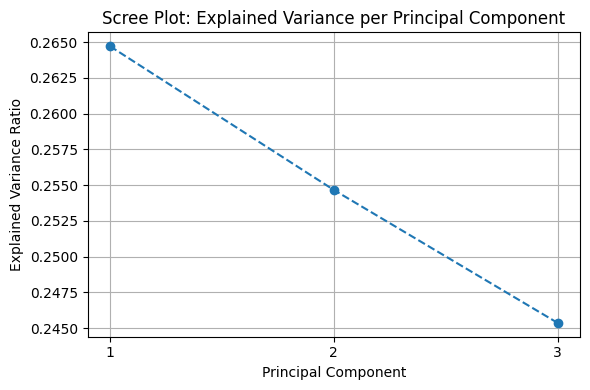


Creating 2D visualization (PC1 vs PC2)...


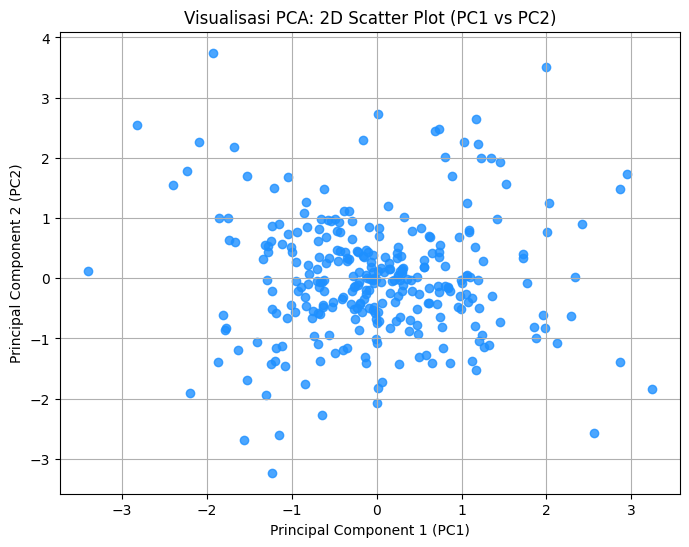

Creating 3D visualization (PC1 vs PC2 vs PC3)...


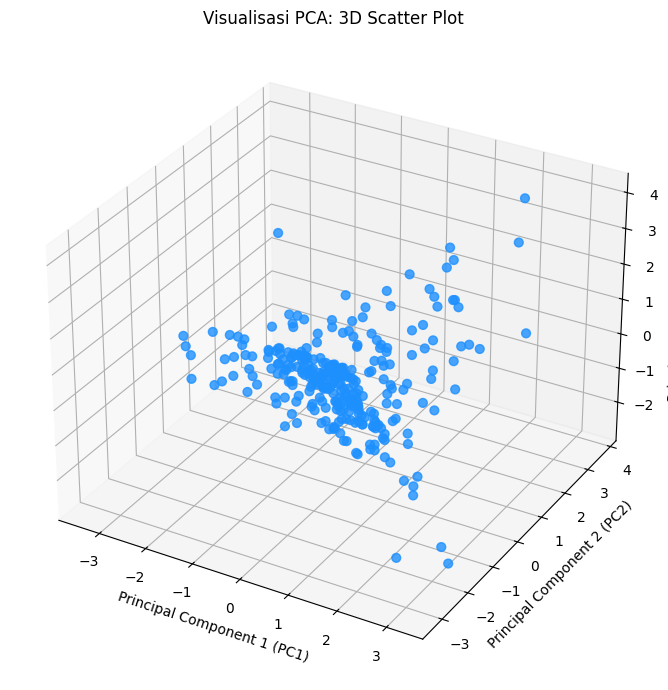

All visualizations have been displayed.


In [113]:
# Step 5: Reduksi Dimensi menggunakan Principal Component Analysis(PCA)
pca = PCA(n_components=3)  # Reduksi ke 3 komponen utama
x_pca = pca.fit_transform(x_scaled)

# Simpan ke DataFrame untuk analisis lanjutan
df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2', 'PC3'])
print("Dimension reduction completed. A new DataFrame containing the extracted components has been generated.")
print(df_pca.head())

# Step 6: Evaluasi Varians
explained = pca.explained_variance_ratio_
total_variance = explained.sum()

print("\nExplained variance ratio per komponen:")
for i, v in enumerate(explained, 1):
    print(f"PC{i}: {v:.4f}")
print(f"Total explained variance (3 komponen): {total_variance:.4f}")

# Visualisasi Scree Plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained) + 1), explained, marker='o', linestyle='--')
plt.title('Scree Plot: Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Visualisasi Hasil
# 7.1. Visualisasi 2D (Scatter Plot PC1 vs PC2)
print("\nCreating 2D visualization (PC1 vs PC2)...")
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='dodgerblue', alpha=0.8)
plt.title('Visualisasi PCA: 2D Scatter Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

# 7.2. Visualisasi 3D (PC1 vs PC2 vs PC3)
print("Creating 3D visualization (PC1 vs PC2 vs PC3)...")
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='dodgerblue', s=40, alpha=0.8)
ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Principal Component 3 (PC3)')
ax.set_title('Visualisasi PCA: 3D Scatter Plot')
plt.tight_layout()
plt.show()

print("All visualizations have been displayed.")

Silhouette Score untuk k=2: 0.2155


Silhouette Score untuk k=3: 0.2629
Silhouette Score untuk k=4: 0.3111
Silhouette Score untuk k=5: 0.2985
Silhouette Score untuk k=6: 0.2874
Silhouette Score untuk k=7: 0.2773
Silhouette Score untuk k=8: 0.2858
Silhouette Score untuk k=9: 0.2750
Silhouette Score untuk k=10: 0.2505

Jumlah klaster optimal berdasarkan Silhouette Score tertinggi adalah: 4



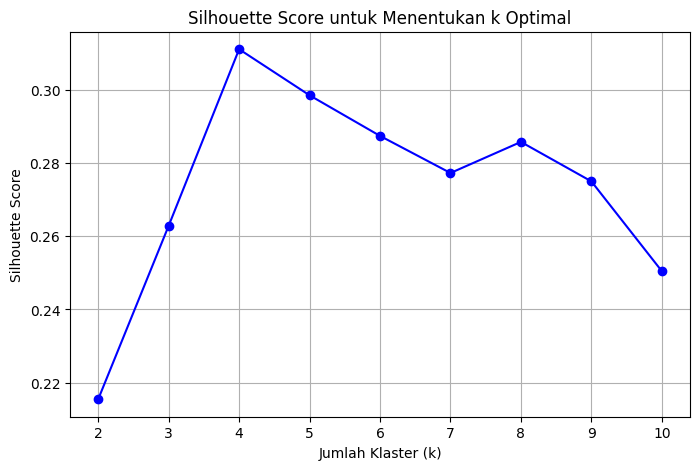

Melakukan klasterisasi dengan k=4...
Memvisualisasikan hasil klaster pada scatter plot PCA...


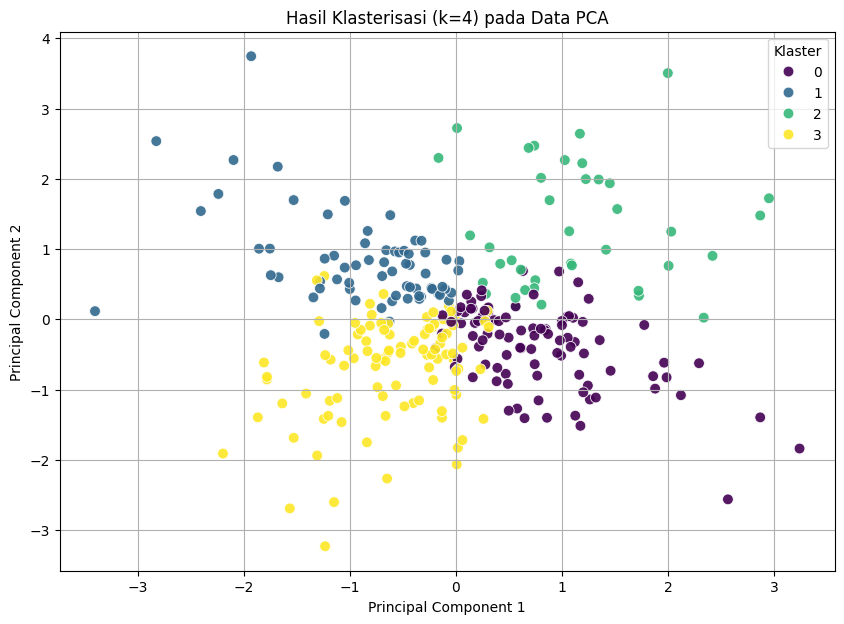


===== Profil Tiap Klaster =====

📦 Klaster 0:
- Jumlah data: 96
- Rata-rata Total Lagu Harian: 12.64
- Distribusi Genre (% dari total kemunculan genre dalam klaster):
Folk          11.52
Reggae         8.90
Blues          8.38
R&B            8.38
Hip Hop        8.38
Metal          8.38
Country        7.85
Rock           7.33
Classical      7.33
Pop            6.81
Indie          5.76
Electronic     5.76
Jazz           5.24

📦 Klaster 1:
- Jumlah data: 66
- Rata-rata Total Lagu Harian: 14.88
- Distribusi Genre (% dari total kemunculan genre dalam klaster):
Folk          10.24
R&B           10.24
Pop           10.24
Jazz           9.45
Electronic     8.66
Blues          7.87
Indie          7.87
Reggae         7.09
Metal          7.09
Country        7.09
Rock           6.30
Classical      4.72
Hip Hop        3.15

📦 Klaster 2:
- Jumlah data: 39
- Rata-rata Total Lagu Harian: 12.90
- Distribusi Genre (% dari total kemunculan genre dalam klaster):
Country       12.36
Metal         11.24
In

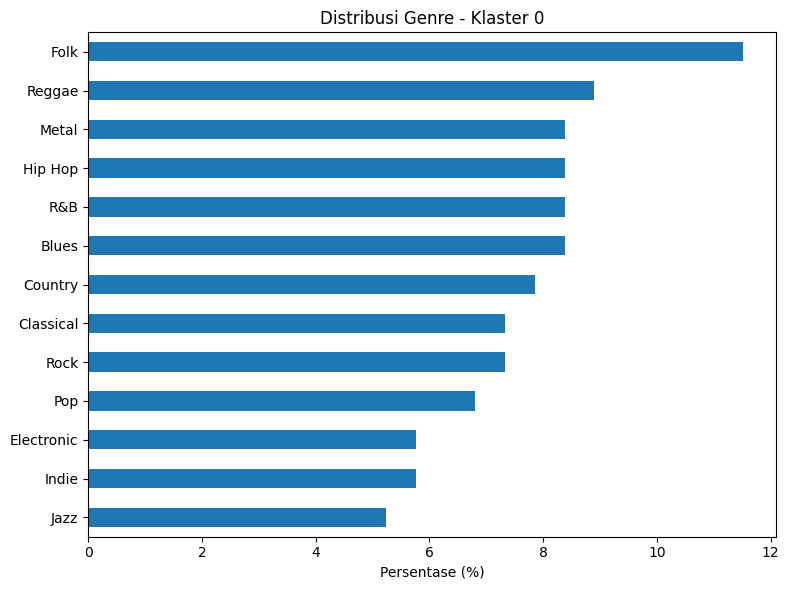

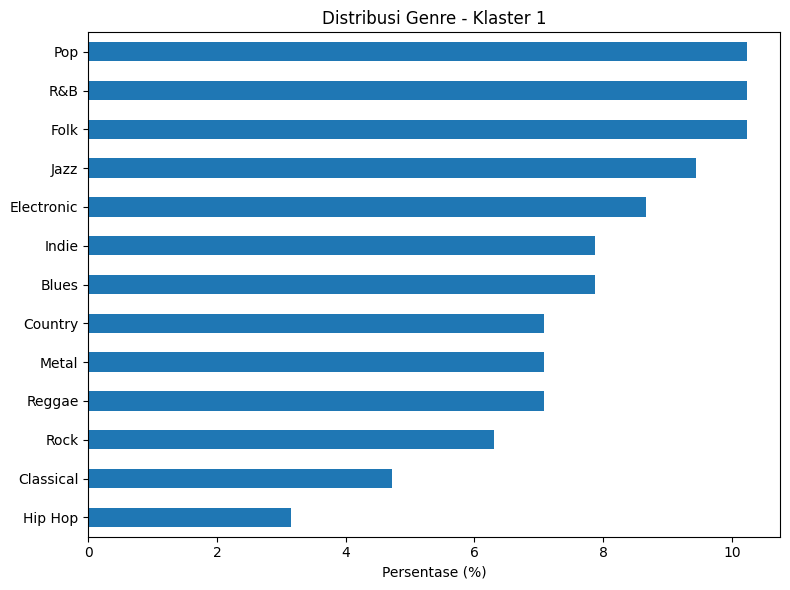

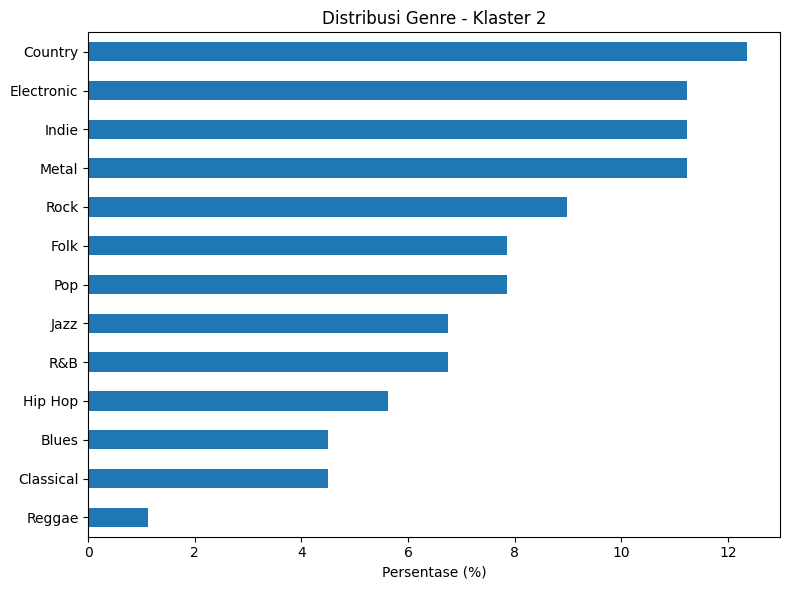

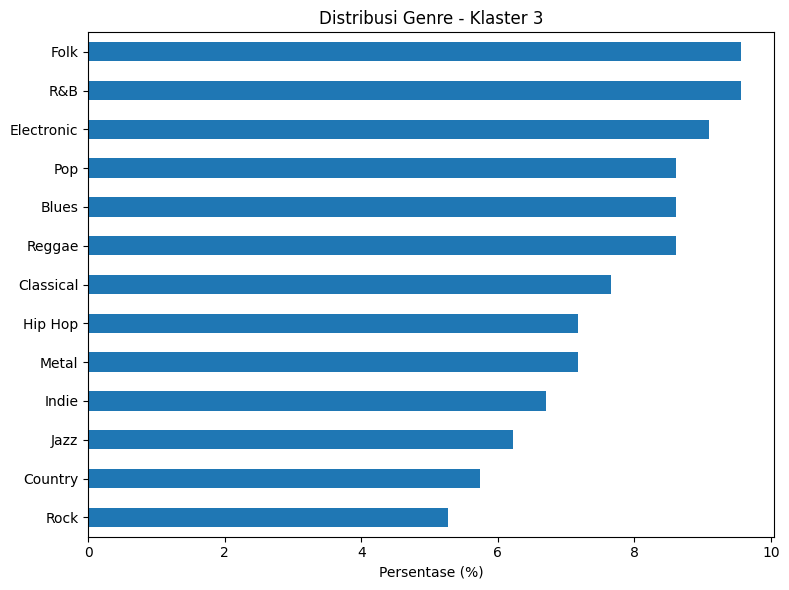

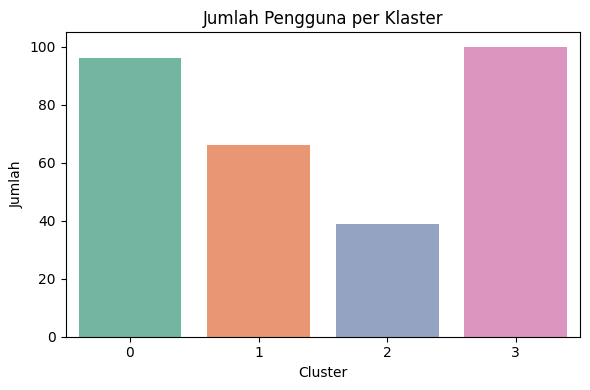

In [114]:
# Step 8: Mencari jumlah cluster terbaik (k) dengan silhoutte score
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Silhouette Score untuk k={k}: {score:.4f}')

# Tentukan jumlah cluster terbaik
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'\nJumlah klaster optimal berdasarkan Silhouette Score tertinggi adalah: {optimal_k}\n')

# Visualisasi Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan k Optimal')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Step 9: Lakukan proses klasterisasi dengan k optimal
print(f"Melakukan klasterisasi dengan k={optimal_k}...")
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Gunakan .fit_predict() untuk melatih model dan mendapatkan label klaster
clusters = kmeans_optimal.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

# Step 10: Visualisasikan klaster pada data hasil PCA
# Tambahkan hasil clustering dan genre ke DataFrame
df_pca['Cluster'] = clusters
df_pca['Genre'] = y_genre.values
df['Genre_List'] = df['Genre_Sering_Didengarkan'].str.split(r',\s*')
df_pca['Genre_List'] = df['Genre_List'].values

# Scatter plot PCA dengan warna berdasarkan klaster
print("Memvisualisasikan hasil klaster pada scatter plot PCA...")
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=60, alpha=0.9)
plt.title(f'Hasil Klasterisasi (k={optimal_k}) pada Data PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Klaster')
plt.grid(True)
plt.show()

# Step 10: Deskrisi tiap klaster
df_pca['Total_Lagu_Harian'] = df['Total_Lagu_Harian'].values
# Hitung distribusi genre dan jumlah lagu per klaster
print("\n===== Profil Tiap Klaster =====")
for cluster_id in range(optimal_k):
    cluster_data = df_pca[df_pca['Cluster'] == cluster_id]
    genre_counter = Counter()

    # Hitung semua genre individual di klaster
    for genre_list in cluster_data['Genre_List']:
        genre_counter.update([g.strip() for g in genre_list])

    total_genre_mentions = sum(genre_counter.values())
    genre_percent = {genre: (count / total_genre_mentions) * 100 for genre, count in genre_counter.items()}
    genre_series = pd.Series(genre_percent).sort_values(ascending=False)

    avg_lagu = cluster_data['Total_Lagu_Harian'].mean()

    print(f"\n📦 Klaster {cluster_id}:")
    print(f"- Jumlah data: {len(cluster_data)}")
    print(f"- Rata-rata Total Lagu Harian: {avg_lagu:.2f}")
    print(f"- Distribusi Genre (% dari total kemunculan genre dalam klaster):")
    print(genre_series.round(2).to_string())

# Visualisasi Bar Chart Genre Tiap Klaster
for cluster_id in range(optimal_k):
    cluster_data = df_pca[df_pca['Cluster'] == cluster_id]
    genre_counter = Counter()
    for genre_list in cluster_data['Genre_List']:
        genre_counter.update([g.strip() for g in genre_list])
    total = sum(genre_counter.values())
    genre_percent = {k: v * 100 / total for k, v in genre_counter.items()}

    plt.figure(figsize=(8, 6))
    pd.Series(genre_percent).sort_values().plot.barh(title=f'Distribusi Genre - Klaster {cluster_id}')
    plt.xlabel('Persentase (%)')
    plt.tight_layout()
    plt.show()

# Step 11: Visualisasi distribusi jumlah pengguna per klaster
plt.figure(figsize=(6,4))
sns.countplot(data=df_pca, x='Cluster', hue='Cluster', palette='Set2')  # hapus legend=False
plt.title('Jumlah Pengguna per Klaster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



--- Penambangan Aturan Asosiasi per Klaster ---

Menganalisis Aturan Asosiasi untuk Klaster 0


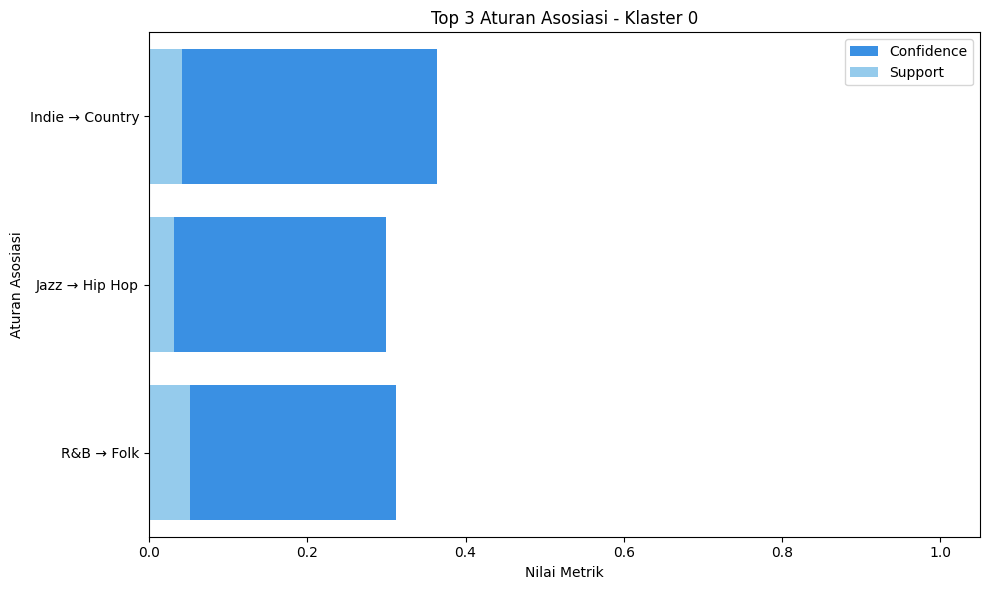

📌 Aturan Paling Signifikan:
antecedents consequents  support  confidence     lift
    (Indie)   (Country) 0.041667    0.363636 2.327273
     (Jazz)   (Hip Hop) 0.031250    0.300000 1.800000
      (R&B)      (Folk) 0.052083    0.312500 1.363636

Menganalisis Aturan Asosiasi untuk Klaster 1


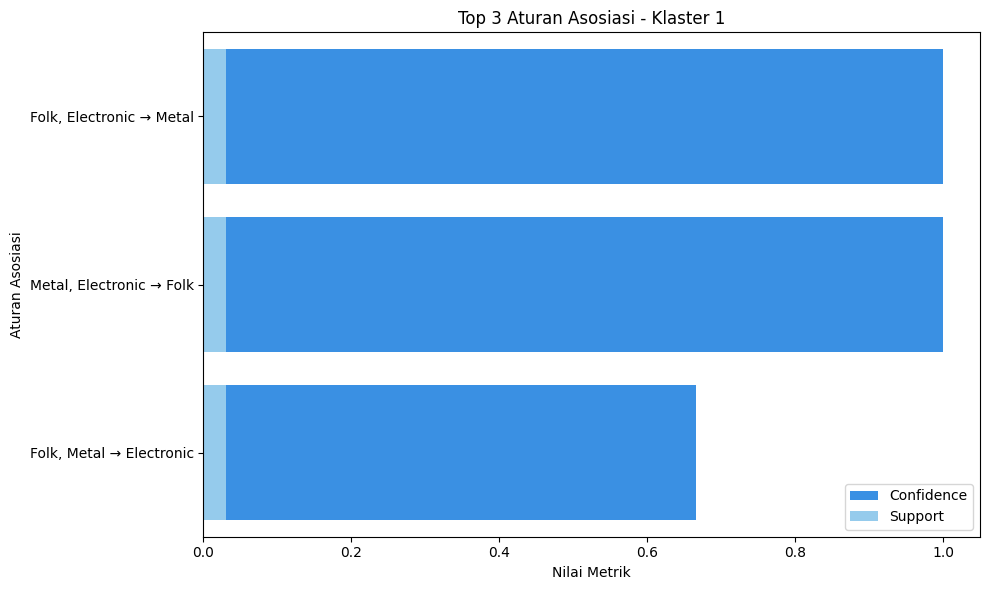

📌 Aturan Paling Signifikan:
        antecedents  consequents  support  confidence     lift
 (Folk, Electronic)      (Metal) 0.030303    1.000000 7.333333
(Metal, Electronic)       (Folk) 0.030303    1.000000 5.076923
      (Folk, Metal) (Electronic) 0.030303    0.666667 4.000000

Menganalisis Aturan Asosiasi untuk Klaster 2


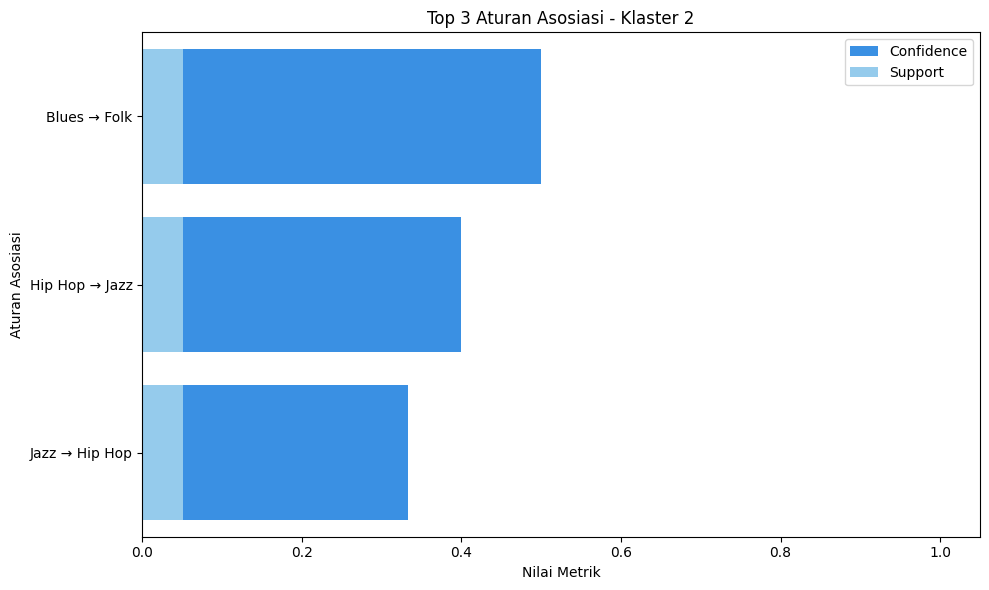

📌 Aturan Paling Signifikan:
antecedents consequents  support  confidence     lift
    (Blues)      (Folk) 0.051282    0.500000 2.785714
  (Hip Hop)      (Jazz) 0.051282    0.400000 2.600000
     (Jazz)   (Hip Hop) 0.051282    0.333333 2.600000

Menganalisis Aturan Asosiasi untuk Klaster 3


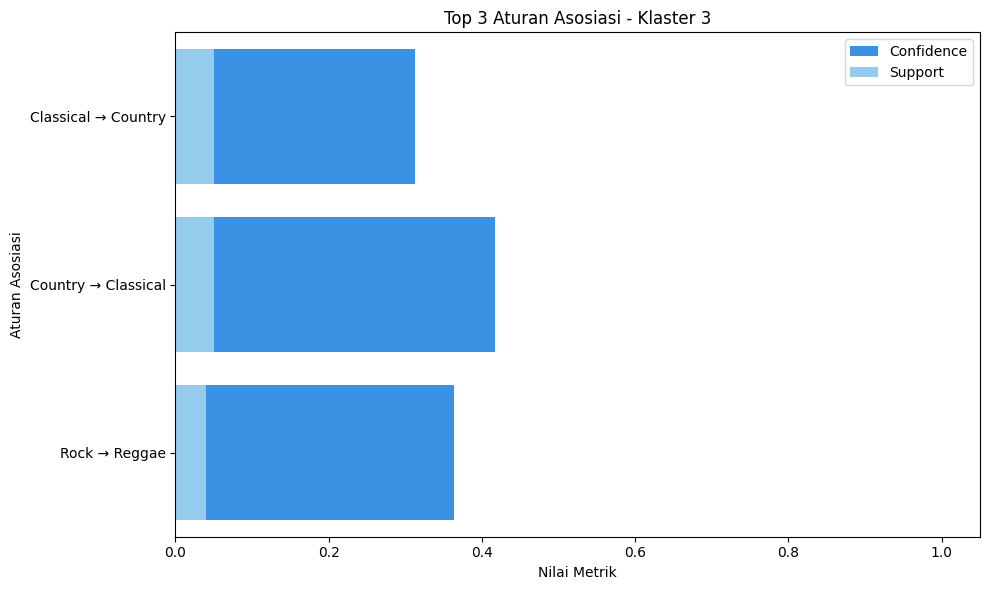

📌 Aturan Paling Signifikan:
antecedents consequents  support  confidence     lift
(Classical)   (Country)     0.05    0.312500 2.604167
  (Country) (Classical)     0.05    0.416667 2.604167
     (Rock)    (Reggae)     0.04    0.363636 2.020202


In [120]:
# Step 11: Penambangan Aturan Asosiasi
print("\n--- Penambangan Aturan Asosiasi per Klaster ---")

# Iterasi setiap klaster
for cluster_id in sorted(df_pca['Cluster'].unique()):
    print(f" \nMenganalisis Aturan Asosiasi untuk Klaster {cluster_id}")

    subset = df_pca[df_pca['Cluster'] == cluster_id]

    if subset.empty or subset['Genre_List'].dropna().empty:
        print("Klaster ini tidak memiliki data genre untuk dianalisis.")
        continue

    genre_lists = subset['Genre_List'].dropna()
    te = TransactionEncoder()
    genre_matrix = te.fit(genre_lists).transform(genre_lists)
    genre_df = pd.DataFrame(genre_matrix, columns=te.columns_)

    freq_items = apriori(genre_df, min_support=0.05, use_colnames=True)

    if freq_items.empty:
        print("❌ Tidak ada kombinasi genre yang cukup sering ditemukan.")
        continue

    rules = association_rules(freq_items, metric='confidence', min_threshold=0.3)

    if rules.empty:
        print("❌ Tidak ada aturan asosiasi yang signifikan ditemukan.")
        continue

    significant_rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)
    top_rules = significant_rules.head(5).copy() # Ambil top 5 agar lebih menarik

    top_rules['rule_label'] = top_rules.apply(
        lambda row: f"{', '.join(row['antecedents'])} → {', '.join(row['consequents'])}",
        axis=1
    )

    plot_df = top_rules.melt(
        id_vars='rule_label',
        value_vars=['support', 'confidence'],
        var_name='Metrik',
        value_name='Nilai'
    )

    # 2. Buat plot vertikal
    plt.figure(figsize=(6, 7))
    sns.barplot(x='rule_label', y='Nilai', hue='Metrik', data=plot_df, palette='viridis')

    plt.title(f'Top 5 Aturan Asosiasi - Klaster {cluster_id}', fontsize=16)
    plt.xlabel('Aturan Asosiasi', fontsize=12)
    plt.ylabel('Nilai Metrik (0.0 - 1.0)', fontsize=12)
    plt.xticks(rotation=15, ha='right') # Rotasi label agar tidak tumpang tindih
    plt.ylim(0, 1.05)
    plt.legend(title='Metrik')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    display_rules = top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()

    # Mengubah frozenset menjadi string agar lebih rapi
    display_rules['antecedents'] = display_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    display_rules['consequents'] = display_rules['consequents'].apply(lambda x: ', '.join(list(x)))

    # 2. Buat Styler object dan terapkan style
    styled_df = display_rules.style.format({
        "support": "{:.3f}",
        "confidence": "{:.3f}",
        "lift": "{:.2f}"
    }).background_gradient(
        cmap='Greens', subset=['support', 'confidence']
    ).background_gradient(
        cmap='Blues', subset=['lift']
    ).set_caption(
        f"Aturan Paling Signifikan untuk Klaster {cluster_id}"
    ).set_properties(**{
        'text-align': 'left',
        'border': '1px solid #ddd'
    }).hide(axis='index')

    # 3. Tampilkan tabel yang sudah di-style
    print("\n") # Memberi sedikit spasi
    display(styled_df)
    print("\n")
